<a href="https://colab.research.google.com/github/madhumithadasarathy/My_Projects/blob/main/Image_Colourization_using_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoders

Colourizing image with help of autoencoder decoder and VGG net.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Input required libraries
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img
from skimage.io import imsave, imshow



In [ ]:
path = '/content/drive/MyDrive/pest/test'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255)


In [ ]:
train = train_datagen.flow_from_directory(path,
                                          target_size=(256, 256),
                                          batch_size=340,
                                          class_mode=None)

Found 450 images belonging to 9 classes.


In [ ]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128) #A and B values range from -127 to 128,
      #so we divide the values by 128 to restrict values to between -1 and 1.
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) #dimensions to be the same for X and Y
print(X.shape)
print(Y.shape)

(340, 256, 256, 1)
(340, 256, 256, 2)


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(1024, (3,3), activation='relu', padding='same'))
model.add(Conv2D(1024, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

In [ ]:
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 512)       1180160   
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 32, 512)      

In [ ]:
model.fit(X,Y,validation_split=0.2, epochs= 20, batch_size=16)

Epoch 1/20
17/17 [==============================] - 13s 803ms/step - loss: 0.0188 - accuracy: 0.8436 - val_loss: 0.0182 - val_accuracy: 0.8664
Epoch 2/20
17/17 [==============================] - 9s 562ms/step - loss: 0.0188 - accuracy: 0.8436 - val_loss: 0.0182 - val_accuracy: 0.8664
Epoch 3/20
17/17 [==============================] - 10s 565ms/step - loss: 0.0188 - accuracy: 0.8436 - val_loss: 0.0182 - val_accuracy: 0.8664
Epoch 4/20
17/17 [==============================] - 10s 564ms/step - loss: 0.0188 - accuracy: 0.8436 - val_loss: 0.0182 - val_accuracy: 0.8664
Epoch 5/20
17/17 [==============================] - 10s 561ms/step - loss: 0.0188 - accuracy: 0.8436 - val_loss: 0.0182 - val_accuracy: 0.8664
Epoch 6/20
17/17 [==============================] - 9s 561ms/step - loss: 0.0188 - accuracy: 0.8436 - val_loss: 0.0182 - val_accuracy: 0.8664
Epoch 7/20
17/17 [==============================] - 10s 562ms/step - loss: 0.0188 - accuracy: 0.8436 - val_loss: 0.0182 - val_accuracy: 0.8664
E

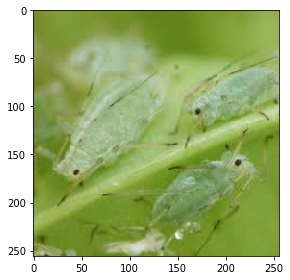

In [ ]:
img1_color=[]

img1 = img_to_array(load_img('/content/drive/MyDrive/pest/test/aphids/jpg_0 - Copy.jpg'))
img1 = resize(img1 ,(256,256))
imshow(img1/256)







# New Section

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


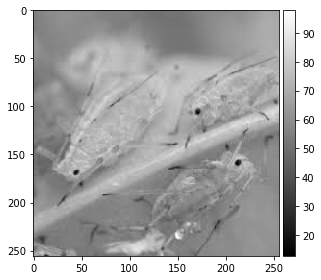

In [ ]:
img1_color.append(img1)

img1_color = np.array(img1_color, dtype=float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
imshow(img1_color[0],cmap='gray')

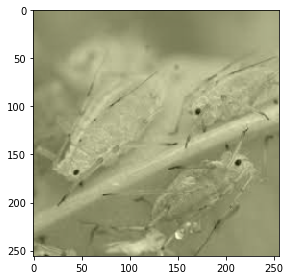

In [ ]:
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128
result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
imshow(lab2rgb(result))